UPDATE on V3:  
Added 2. Display an image for each shape

This kernel uses the following kernel code:
* https://www.kaggle.com/h4211819/image-size-eda
* https://www.kaggle.com/yangsaewon/basic-eda-train-test-image-distribution-check
* https://www.kaggle.com/kaerunantoka/extract-image-features

I think that this competition needs to be careful because the target is biased due to the shape of the image.  
Also, I think that the information of the image shape of the previous competition will be helpful, but because it can not be read from the kernel, I released the [dataset](https://www.kaggle.com/currypurin/diabetic-retinopathy-detection-image-size) and [discussion](https://www.kaggle.com/c/aptos2019-blindness-detection/discussion/99846).

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys
import os
import pickle
from tqdm import tqdm_notebook as tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [3]:
print(os.listdir('../data'))
#print(os.listdir('../data/diabetic-retinopathy-detection-image-size'))

['train.csv', 'npy_files', 'duplicates.npy', '.ipynb_checkpoints', 'train12.csv', 'dups_with_same_diagnosis.npy', 'test_images', 'train_all.csv', 'train_images', 'sample_submission.csv', 'train_messidor.csv', 'train_old.csv', 'test.csv', 'bad_train_indices.npy', 'logs.md', 'duplicate_test_ids.npy']


# 1. present competition

In [4]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [5]:
len(train), len(test)

(3662, 1928)

In [6]:
#the func is from https://www.kaggle.com/toshik/image-size-and-rate-of-new-whale
def get_size_list(targets, dir_target):
    result = list()
    for target in tqdm(targets):
        img = np.array(Image.open(os.path.join(dir_target, target+'.png')))
        result.append(img.shape)
    return result

# the func is from https://www.kaggle.com/kaerunantoka/extract-image-features
def get_size(file_name_list, dir_target):
    result = list()
    #filename = images_path + filename
    for file_name in tqdm(file_name_list):
        st = os.stat(f'{dir_target}/{file_name}.png')
        result.append(st.st_size)
    return result

In [8]:
train['image_shape'] = get_size_list(train.id_code.tolist(),
                                     dir_target='../data/train_images')
test['image_shape'] = get_size_list(test.id_code.tolist(),
                                    dir_target='../data/test_images')
train['image_size'] = get_size(train.id_code.tolist(),
                               dir_target='../data/train_images')
test['image_size'] = get_size(test.id_code.tolist(),
                              dir_target='../data/test_images')

In [9]:
train.head()

,id_code,diagnosis,image_shape,image_size
0,000c1434d8d7,2,"(2136, 3216, 3)",3218676
1,001639a390f0,4,"(2136, 3216, 3)",2261129
2,0024cdab0c1e,1,"(1736, 2416, 3)",1882172
3,002c21358ce6,0,"(1050, 1050, 3)",975218
4,005b95c28852,0,"(1536, 2048, 3)",1819430


In [10]:
for df in [train, test]:
    df['height'] = df['image_shape'].apply(lambda x:x[0])
    df['width'] = df['image_shape'].apply(lambda x:x[1])
    df['width_height_ratio'] = df['height'] / df['width']
    df['width_height_added'] = df['height'] + df['width']

In [11]:
train.head()

,id_code,diagnosis,image_shape,image_size,height,width,width_height_ratio,width_height_added
0,000c1434d8d7,2,"(2136, 3216, 3)",3218676,2136,3216,0.664179,5352
1,001639a390f0,4,"(2136, 3216, 3)",2261129,2136,3216,0.664179,5352
2,0024cdab0c1e,1,"(1736, 2416, 3)",1882172,1736,2416,0.718543,4152
3,002c21358ce6,0,"(1050, 1050, 3)",975218,1050,1050,1.000000,2100
4,005b95c28852,0,"(1536, 2048, 3)",1819430,1536,2048,0.750000,3584


In [12]:
train.describe()

,diagnosis,image_size,height,width,width_height_ratio,width_height_added
count,3662.000000,3.662000e+03,3662.000000,3662.000000,3662.000000,3662.000000
mean,1.126980,2.349280e+06,1526.830147,2015.176679,0.796761,3542.006827
std,1.298409,1.762452e+06,542.663120,884.301940,0.126391,1419.133265
min,0.000000,2.217370e+05,358.000000,474.000000,0.664179,832.000000
25%,0.000000,1.003996e+06,1050.000000,1050.000000,0.718543,2100.000000
50%,1.000000,1.934951e+06,1536.000000,2144.000000,0.750000,3584.000000
75%,2.000000,2.846848e+06,1958.000000,2588.000000,1.000000,4546.000000
max,4.000000,7.674292e+06,2848.000000,4288.000000,1.000000,7136.000000


In [13]:
test.describe()

,image_size,height,width,width_height_ratio,width_height_added
count,1.928000e+03,1928.000000,1928.000000,1928.000000,1928.000000
mean,8.370050e+05,783.152490,1043.535788,0.755328,1826.688278
std,1.291580e+06,541.308109,740.511732,0.048644,1280.116549
min,1.827340e+05,480.000000,640.000000,0.671271,1120.000000
25%,2.192625e+05,480.000000,640.000000,0.750000,1120.000000
50%,2.297655e+05,480.000000,640.000000,0.750000,1120.000000
75%,4.286760e+05,614.000000,819.000000,0.750000,1433.000000
max,5.810538e+06,1958.000000,2896.000000,1.000000,4840.000000


In [20]:
# train.to_csv('../data/train_meta.csv', index=False)
# test.to_csv('../data/test_meta.csv', index=False)

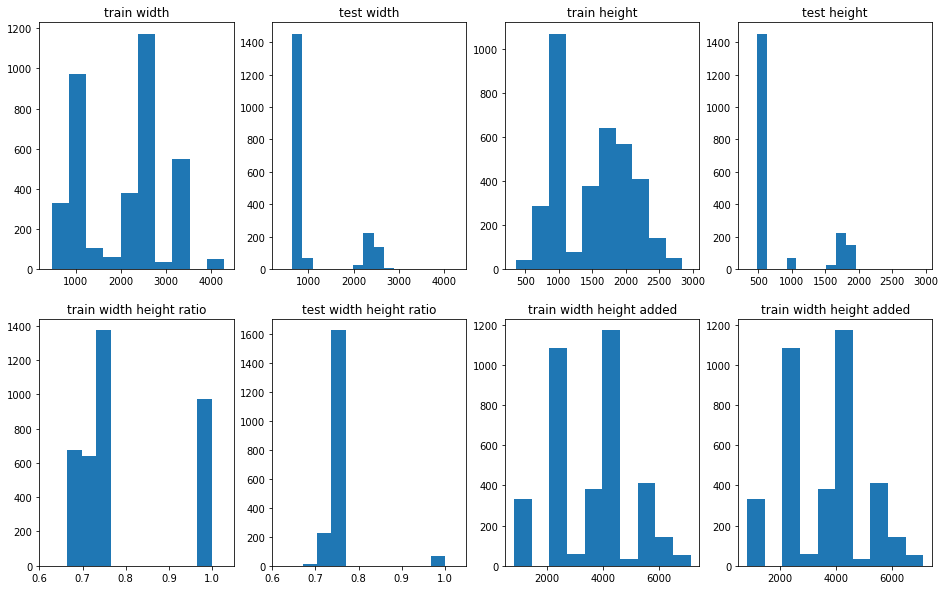

In [14]:
fig = plt.figure(figsize=(16,10))
plt.subplot(241)
plt.hist(train['width'])
plt.title("train width")
plt.xlim(200, 4500)

plt.subplot(242)
plt.hist(test['width'])
plt.title("test width")
plt.xlim(200, 4500)

plt.subplot(243)
plt.hist(train['height'])
plt.title("train height")
plt.xlim(200, 3100)

plt.subplot(244)
plt.hist(test['height'])
plt.title("test height")
plt.xlim(200, 3100)

plt.subplot(245)
plt.hist(train['width_height_ratio'])
plt.title("train width height ratio")
plt.xlim(0.6, 1.05)


plt.subplot(246)
plt.hist(test['width_height_ratio'])
plt.title("test width height ratio")
plt.xlim(0.6, 1.05)

plt.subplot(247)
plt.hist(train['width_height_added'])
plt.title("train width height added")

plt.subplot(248)
plt.hist(train['width_height_added'])
plt.title("train width height added");

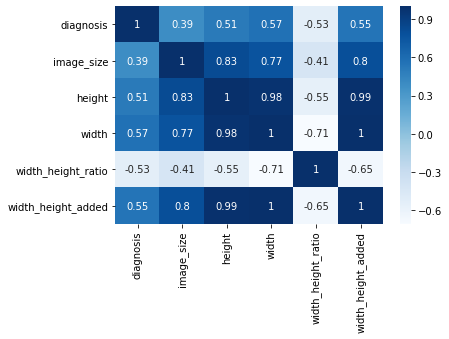

In [15]:
sns.heatmap(train.corr(), cmap=plt.cm.Blues, annot=True)

* Many feature seems to be correlated with the target.

In [13]:
train_meta = train.groupby(['width', 'height', 'diagnosis']).agg({'diagnosis':'count'}).unstack('diagnosis').fillna(0)
train_meta.columns = [f'{i[0]}_{i[1]}' for i in train_meta.columns]
train_meta['train_count'] = train_meta.sum(axis=1)

test_meta = test.groupby(['width', 'height']).agg({'id_code':'count'}).rename(columns={'id_code':'pub_test_count'})
count_ratio = train_meta.join(test_meta, how='outer')

for i in range(5):
    count_ratio.loc[:, f'{i}_ratio'] = count_ratio.iloc[:, i] / count_ratio['train_count']

count_ratio = count_ratio.fillna(0)

count_ratio = count_ratio.astype({'diagnosis_0': int, 'diagnosis_1': int, 'diagnosis_2': int,
                                  'diagnosis_3': int, 'diagnosis_4': int})
count_ratio = count_ratio.astype({'train_count': int, 'pub_test_count': int})

count_ratio.reset_index(inplace=True)
count_ratio.set_index(['width', 'height', 'train_count', 'pub_test_count'], inplace=True)

In [14]:
count_ratio

,,,,diagnosis_0,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4,0_ratio,1_ratio,2_ratio,3_ratio,4_ratio
width,height,train_count,pub_test_count,,,,,,,,,,
474,358,2,0,0,0,1,0,1,0.000000,0.000000,0.500000,0.000000,0.500000
640,480,42,1403,0,0,33,5,4,0.000000,0.000000,0.785714,0.119048,0.095238
768,576,0,2,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
819,614,287,45,279,7,1,0,0,0.972125,0.024390,0.003484,0.000000,0.000000
1050,1050,974,69,901,19,39,2,13,0.925051,0.019507,0.040041,0.002053,0.013347
1467,1110,2,2,0,0,2,0,0,0.000000,0.000000,1.000000,0.000000,0.000000
1476,1117,14,2,10,0,0,2,2,0.714286,0.000000,0.000000,0.142857,0.142857
1504,1000,92,0,0,2,63,9,18,0.000000,0.021739,0.684783,0.097826,0.195652
1844,1226,61,0,0,13,28,1,19,0.000000,0.213115,0.459016,0.016393,0.311475


* Training data has different target distribution for each image shape.
  * For example 1050x1050 is high ratio of class_0, 2136x3216 is high ratio of class_2
* If we leave the image shape information in the preprocessed image, there is a possibility of overfitting, so be very careful.
* Let's look at the images.

# 2.Display an image for each shape

In [18]:
def im_show(height, width, num):
    tmp = train[(train['width'] == width) & (train['height'] == height)].id_code
    dir_target = '../data/train_images'
    id = tmp.values[num]
    img = Image.open(os.path.join(dir_target, id +'.png'))
    plt.imshow(img.resize((256, 256)))
    plt.tick_params(bottom=False,
                    left=False,
                    right=False,
                    top=False,
                    labelbottom=False,
                    labelleft=False,
                    labelright=False,
                    labeltop=False)
    value = train.loc[train['id_code'] == id, :].values[0]
    plt.title(f'({value[4]},{value[5]})->(256,256)\n {id}, diagnosis:{value[1]}')

def five_img_plot(height, width):
    print('-' * 10)
    print(f'shape({height}, {width})')
    plt.figure(figsize=(16, 4))
    for i in range(5):
        plt.subplot(1,5,i+1)
        im_show(height, width, i)
    plt.show()

----------
shape(480, 640)


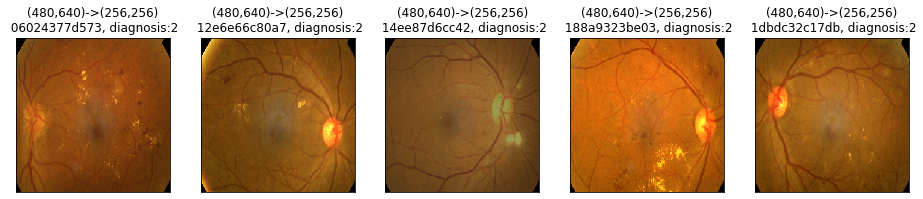

----------
shape(614, 819)


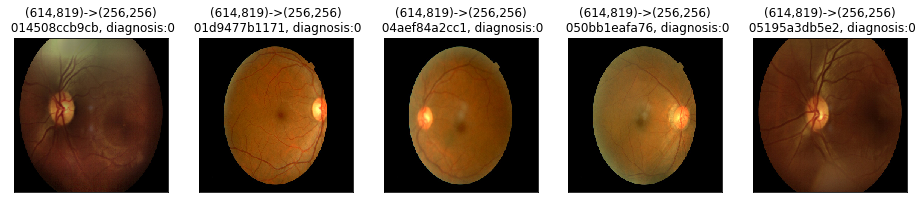

----------
shape(1050, 1050)


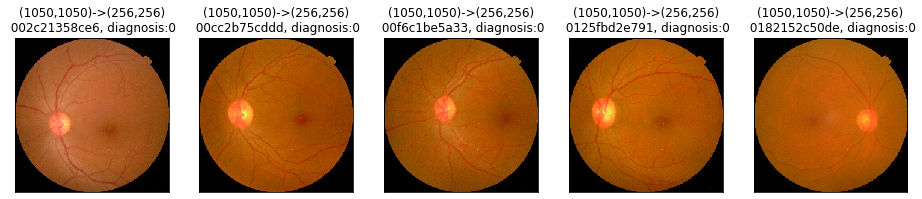

----------
shape(1536, 2048)


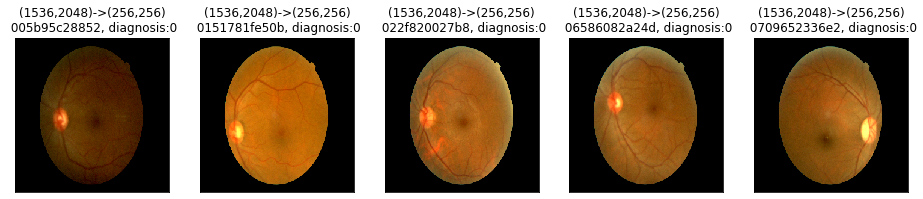

----------
shape(1736, 2416)


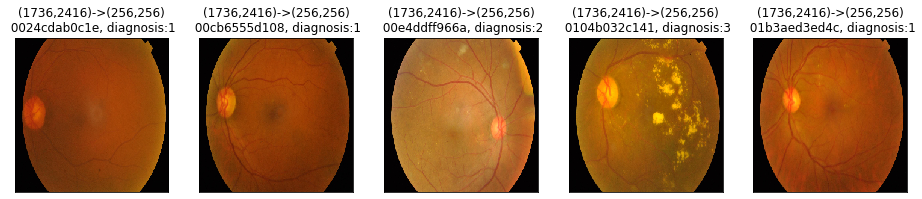

----------
shape(1958, 2588)


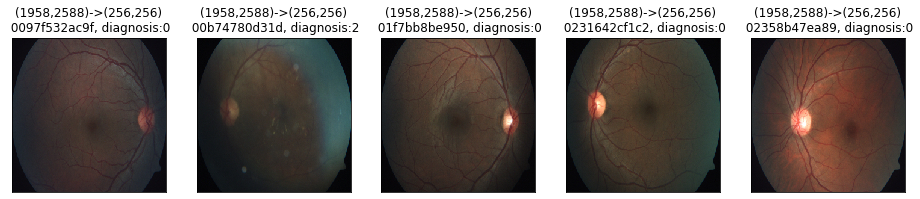

----------
shape(2588, 3388)


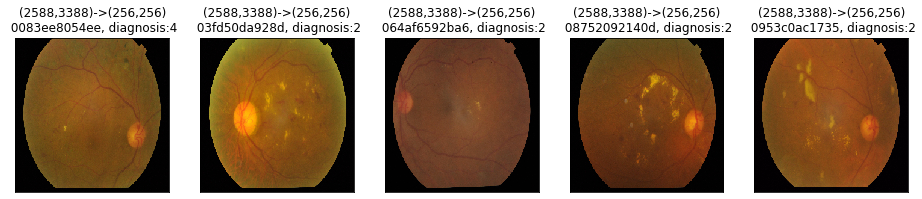

In [19]:
five_img_plot(480, 640)
five_img_plot(614, 819)
five_img_plot(1050, 1050)
five_img_plot(1536, 2048)
five_img_plot(1736, 2416)
five_img_plot(1958, 2588)
five_img_plot(2588, 3388)

* The proportion of black area and the tendency of brightness are also likely to be in each image shape.
* I would like to update this point later.
* ref : https://www.kaggle.com/c/aptos2019-blindness-detection/discussion/99846#575147

# 3.previous competition

There are about 90,000 images of [the previous competition](https://www.kaggle.com/c/diabetic-retinopathy-detection) and Kernel can not read all the images. So I run the same code as above, and [dataset](https://www.kaggle.com/currypurin/diabetic-retinopathy-detection-image-size) made public.

In [17]:
pre_train = pd.read_csv('../input/diabetic-retinopathy-detection-image-size/pre_train_shape.csv')
pre_test = pd.read_csv('../input/diabetic-retinopathy-detection-image-size/pre_test_shape.csv')

for df in [pre_train, pre_test]:
    df['width_height_ratio'] = df['height'] / df['width']
    df['width_height_added'] = df['height'] + df['width']

In [18]:
len(pre_train), len(pre_test)

(35126, 53576)

* The number of images of the last competition is very large.

In [19]:
pre_train.head()

,image,level,image_shape,image_size,height,width,channel,width_height_ratio,width_height_added
0,10_left,0,"(3168, 4752, 3)",1542020,3168,4752,3,0.666667,7920
1,10_right,0,"(3168, 4752, 3)",1467160,3168,4752,3,0.666667,7920
2,13_left,0,"(1944, 2592, 3)",801518,1944,2592,3,0.750000,4536
3,13_right,0,"(1944, 2592, 3)",761507,1944,2592,3,0.750000,4536
4,15_left,1,"(3264, 4928, 3)",1034031,3264,4928,3,0.662338,8192


In [20]:
pre_test.head()

,image,level,image_shape,image_size,height,width,channel,width_height_ratio,width_height_added
0,1_left,0,"(2336, 3504, 3)",1147508,2336,3504,3,0.666667,5840
1,1_right,0,"(2336, 3504, 3)",1183978,2336,3504,3,0.666667,5840
2,2_left,0,"(1920, 2560, 3)",359372,1920,2560,3,0.750000,4480
3,2_right,0,"(1920, 2560, 3)",376230,1920,2560,3,0.750000,4480
4,3_left,0,"(1920, 2560, 3)",481639,1920,2560,3,0.750000,4480


In [21]:
pre_train.describe()

,level,image_size,height,width,channel,width_height_ratio,width_height_added
count,35126.000000,3.512600e+04,35126.000000,35126.000000,35126.0,35126.000000,35126.000000
mean,0.526049,1.080232e+06,2473.033166,3636.655241,3.0,0.685896,6109.688407
std,0.970390,4.203332e+05,471.474465,801.830170,0.0,0.037909,1270.287523
min,0.000000,8.254000e+03,289.000000,400.000000,3.0,0.660714,715.000000
25%,0.000000,7.560990e+05,1944.000000,2816.000000,3.0,0.666667,4696.000000
50%,0.000000,1.163805e+06,2592.000000,3888.000000,3.0,0.666667,6480.000000
75%,1.000000,1.431174e+06,2592.000000,3888.000000,3.0,0.666667,6480.000000
max,4.000000,2.169494e+06,3456.000000,5184.000000,3.0,1.000000,8640.000000


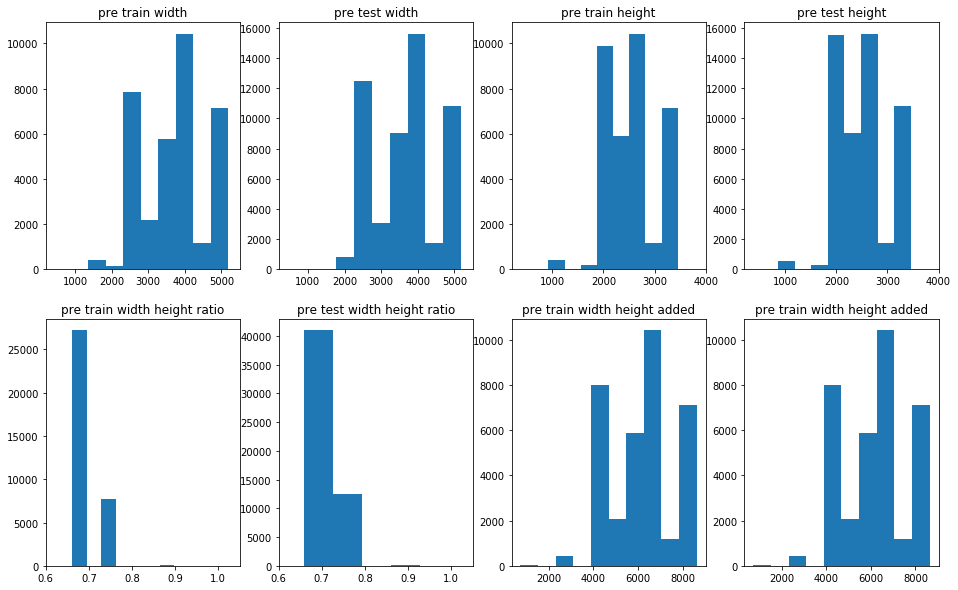

In [22]:
fig = plt.figure(figsize=(16,10))
plt.subplot(241)
plt.hist(pre_train['width'])
plt.title("pre train width")
plt.xlim(200, 5500)

plt.subplot(242)
plt.hist(pre_test['width'])
plt.title("pre test width")
plt.xlim(200, 5500)

plt.subplot(243)
plt.hist(pre_train['height'])
plt.title("pre train height")
plt.xlim(200, 4000)

plt.subplot(244)
plt.hist(pre_test['height'])
plt.title("pre test height")
plt.xlim(200, 4000)

plt.subplot(245)
plt.hist(pre_train['width_height_ratio'])
plt.title("pre train width height ratio")
plt.xlim(0.6, 1.05)


plt.subplot(246)
plt.hist(pre_test['width_height_ratio'])
plt.title("pre test width height ratio")
plt.xlim(0.6, 1.05)

plt.subplot(247)
plt.hist(pre_train['width_height_added'])
plt.title("pre train width height added")

plt.subplot(248)
plt.hist(pre_train['width_height_added'])
plt.title("pre train width height added");

In [23]:
pre_train.drop('channel', axis=1, inplace=True)
pre_test.drop('channel', axis=1, inplace=True)

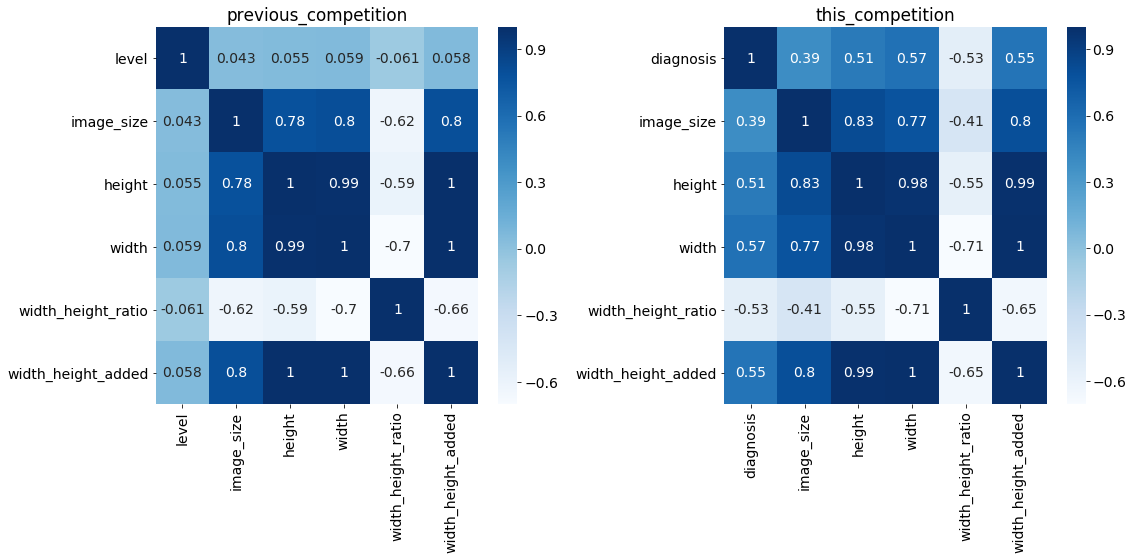

In [24]:
plt.rcParams["font.size"] = 14
# pre_train.rename(columns={'level': 'diagnosis'}, inplace=True)
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.heatmap(pre_train.corr(), cmap=plt.cm.Blues, annot=True)
plt.title('previous_competition')

plt.subplot(122)
sns.heatmap(train.corr(), cmap=plt.cm.Blues, annot=True)
plt.title('this_competition')

plt.tight_layout()

In [25]:
pre_train_meta = pre_train.groupby(['width', 'height', 'level']).agg({'level':'count'}).unstack('level').fillna(0)
pre_train_meta.columns = [f'{i[0]}_{i[1]}' for i in pre_train_meta.columns]
pre_train_meta['train_count'] = pre_train_meta.sum(axis=1)

pre_test_meta = pre_test.groupby(['width', 'height']).agg({'image':'count'}).rename(columns={'image':'pub_test_count'})
pre_count_ratio = pre_train_meta.join(pre_test_meta, how='outer')

for i in range(5):
    pre_count_ratio.loc[:, f'{i}_ratio'] = pre_count_ratio.iloc[:, i] / pre_count_ratio['train_count']

pre_count_ratio = pre_count_ratio.fillna(0)

pre_count_ratio = pre_count_ratio.astype({'level_0': int, 'level_1': int, 'level_2': int, 'level_3': int, 'level_4': int})
pre_count_ratio = pre_count_ratio.astype({'train_count': int, 'pub_test_count': int})

pre_count_ratio.reset_index(inplace=True)
pre_count_ratio.set_index(['width', 'height', 'train_count', 'pub_test_count'], inplace=True)

In [26]:
pre_count_ratio

,,,,level_0,level_1,level_2,level_3,level_4,0_ratio,1_ratio,2_ratio,3_ratio,4_ratio
width,height,train_count,pub_test_count,,,,,,,,,,
320,211,0,2,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
400,315,19,25,16,0,2,1,0,0.842105,0.000000,0.105263,0.052632,0.000000
433,289,2,0,2,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
800,533,0,4,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
1444,1444,6,9,6,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
1600,1216,2,6,1,0,1,0,0,0.500000,0.000000,0.500000,0.000000,0.000000
1620,1444,10,17,10,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
1792,1184,414,560,321,10,73,9,1,0.775362,0.024155,0.176329,0.021739,0.002415
1920,2560,0,1,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000


# 4.Number of image and ratio by image shape in previous and present competition

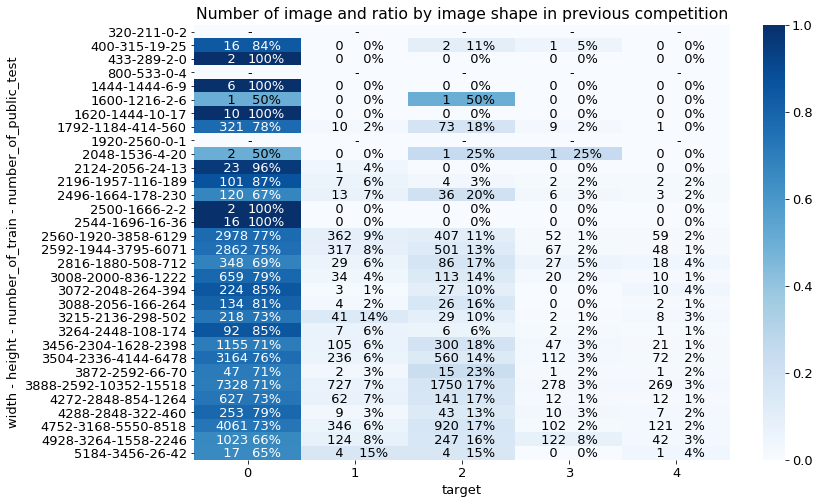

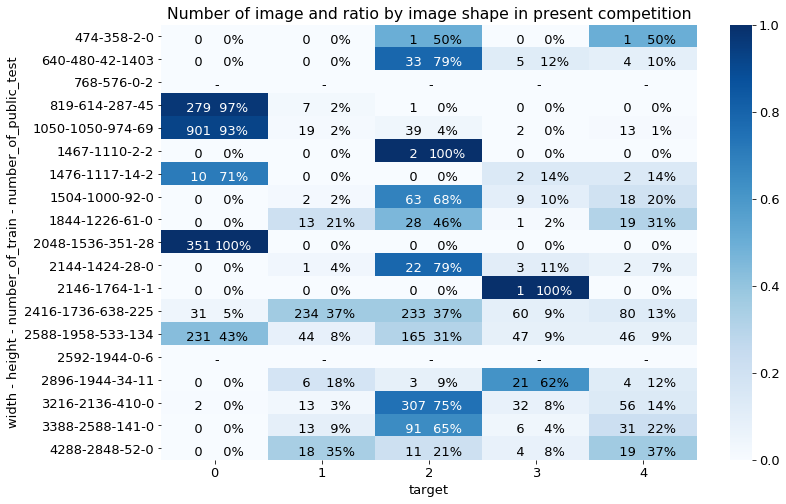

In [27]:
plt.rcParams["font.size"] = 13
plt.figure(figsize=(12, 8))
sns.heatmap(pre_count_ratio.iloc[:, 5:], cmap=plt.cm.Blues)
plt.xlabel('target')
plt.ylabel('width - height - number_of_train - number_of_public_test')
plt.title('Number of image and ratio by image shape in previous competition')
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ['0',  '1', '2', '3', '4'])
for i, j in itertools.product(range(5), range(len(pre_count_ratio))):
    train_count = pre_count_ratio.index[j][2]
    if train_count != 0:
        ratio = np.int(np.round(pre_count_ratio.iloc[j, i+5] * 100))
        count = pre_count_ratio.iloc[j, i]
        plt.text(i+0.2, j+0.8, f'{count:>4}', color='k'if ratio < 65 else "w")
        plt.text(i+0.5, j+0.8, f'{ratio:>3}%', color='k'if ratio < 65 else "w")
    elif train_count == 0:
        plt.text(i+0.5, j+0.8, '-', color='k')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(count_ratio.iloc[:, 5:], cmap=plt.cm.Blues)
plt.xlabel('target')
plt.ylabel('width - height - number_of_train - number_of_public_test')
plt.title('Number of image and ratio by image shape in present competition')
for i, j in itertools.product(range(5), range(len(count_ratio))):
    train_count = count_ratio.index[j][2]
    if train_count != 0:
        ratio = np.int(np.round(count_ratio.iloc[j, i+5] * 100))
        count = count_ratio.iloc[j, i]
        plt.text(i+0.2, j+0.8, f'{count:>4}', color='k'if ratio < 65 else "w")
        plt.text(i+0.5, j+0.8, f'{ratio:>3}%', color='k'if ratio < 65 else "w")
    elif train_count == 0:
        plt.text(i+0.5, j+0.8, '-', color='k')
    plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ['0',  '1', '2', '3', '4'])
plt.show();

* The bias of the class by the shape of the train image was small in the last competition, but this time the competition is not.
* In the previous competition, the ranking change on the public and private leaderboard is not large.
* I think that this bias may cause a large shakeup.